In [14]:
# to use for customizing the display/formatt of the cells
# for more info and resources check these links:
# http://stackoverflow.com/questions/34303422/how-to-change-the-font-size-and-color-of-markdown-cell-in-ipython-py-2-7-noteb
# http://nbviewer.jupyter.org/github/Carreau/posts/blob/master/Blog1.ipynb
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:0.5em;
margin-bottom:0.5em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.7em;
line-height:1.1em;
text-align:left;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.3em;
padding-left:1em;
padding-right:1em;
}
</style>
""")

# Continuous features testing

This notebook tests building models using sequences that include only continuous features. The sequences are generated using  <span style="color:blue">SeqGenerator()</span> class. These sequences intrinsically include a pattern between the features and the labels generated. The cell below will show the structure of such generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2']
X sequence:
 {1: {'f_0': '39.98621019163647', 'f_4': '72.78918237425341', 'f_1': '28.229812805285764', 'f_3': '127.15512554580317', 'f_2': '97.59150343401059'}, 2: {'f_0': '2.324487368178808', 'f_4': '66.96296995094612', 'f_1': '23.015375636620465', 'f_3': '78.53323941055882', 'f_2': '121.8976902849994'}, 3: {'f_0': '12.156645477802488', 'f_4': '69.22809120553606', 'f_1': '50.994773996233405', 'f_3': '79.03449442697392', 'f_2': '106.67328922863017'}, 4: {'f_0': '31.467544376580936', 'f_4': '81.34960298038273', 'f_1': '30.698352235924908', 'f_3': '106.32454800754354', 'f_2': '113.27000029437954'}, 5: {'f_0': '127.36087668841634', 'f_4': '202.61401176327524', 'f_1': '133.4782985548251', 'f_3': '251.96232617660692', 'f_2': '254.55915497266474'}, 6: {'f_0': '144.98584622134743', 'f_4': '209.98122309473487', 'f_1': '147.94749227316828', 'f_3': '220.33359288896432', 'f_2': '266.5074622064187'}, 7: {'f_0': '149.78601363

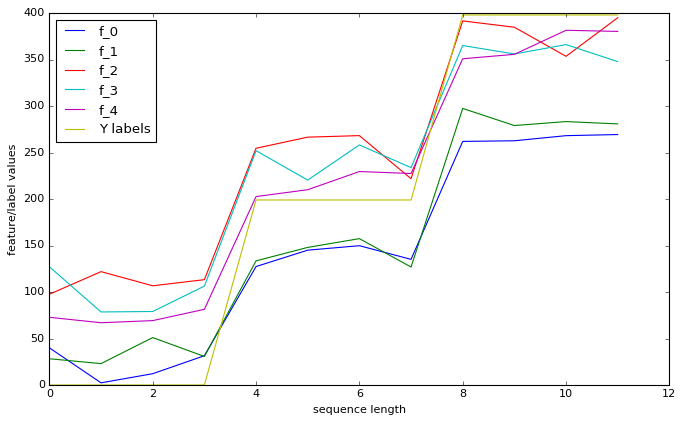

In [1]:
import sys
import os
package_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, package_dir)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from experiment_cont_features import *

def plot_seq_features(seq):
    features_mean = []
    num_features = len(seq.X[1].keys())
    for f in range(num_features):
        f_vals = []
        for i in range(seq.T):
            f_val = float(seq.X[i+1]["f_{}".format(f)])
            f_vals.append(f_val)
        features_mean.append(np.mean(f_vals))
        plt.plot(f_vals, label='f_{}'.format(f))
    # plot the labels -- seq.flat_y attribute is the list of labels of Y
    overall_mean = np.mean(features_mean)
    plt.plot([int(elem)*overall_mean for elem in seq.flat_y], label='Y labels')
    plt.xlabel('sequence length')
    plt.ylabel('feature/label values')
    plt.legend(loc='upper left')

# generate sequences with length = 10  with labels = 3 and continuous features = 5
# initialize sequence generator
seq_generator = SeqGenerator(10, 3, 5, "rescaling", 0)
# generate 2 sequences
seqs = seq_generator.generate_seqs(2)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

As it can be seen from the plot above, the features although include random values, they are tied to a range for every
label. For example, in the above figure we have <span style="color:red">3</span> labels <span style="color:red">0, 1, 2</span> where each label is associated to a range of values for each of the <span style="color:rgb(34,139,34)
">4</span> features we have. In other words, observations/feature values increase monotonically for every new label assigned to. The labels were scaled by the mean value of the features for visualization purposes.
<br/>
Below, we generate again another sequences where we increase the number of labels to <span style="color:red">5</span> to further demonstrate the structure of the generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4']
X sequence:
 {1: {'f_0': '73.41396137492315', 'f_7': '126.43394375625785', 'f_4': '109.48341689062093', 'f_8': '73.65575669385296', 'f_5': '107.19919429779073', 'f_2': '70.09033589164352', 'f_9': '128.98613000039362', 'f_1': '83.47361213191546', 'f_3': '46.45805119378652', 'f_6': '64.33885933425032'}, 2: {'f_0': '68.545700877811', 'f_7': '98.58005940849002', 'f_4': '122.18083244099083', 'f_8': '80.89375713285439', 'f_5': '88.73002881912338', 'f_2': '107.76394560039469', 'f_9': '117.95009853307432', 'f_1': '64.80669174046875', 'f_3': '41.91145761669814', 'f_6': '60.99072723847823'}, 3: {'f_0': '118.34218380280572', 'f_7': '101.5271758117768', 'f_4': '109.59827022302471', 'f_8': '113.20390690522473', 'f_5': '70.57292681020579', 'f_2': '109.95502640475445', 'f_9': '86.93313534793646', 'f_1': '66.29946028368747', 'f_3': '9.235249352486381', 'f_6': '40.09493548751331'}, 4: {'f_0

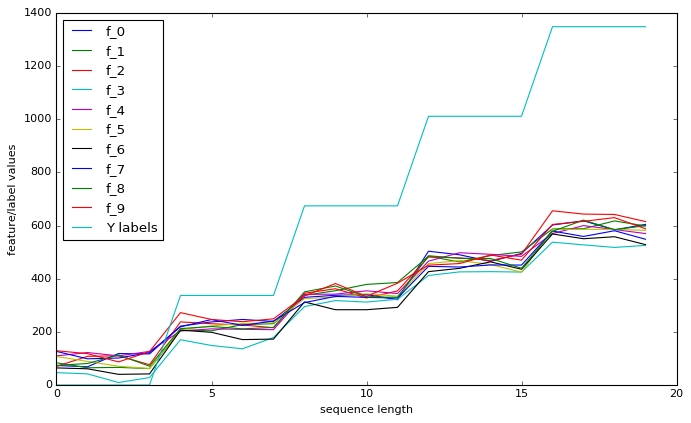

In [2]:
# generate sequences with length = 20, labels = 5 and continuous features = 10
# initialize sequence generator
seq_generator = SeqGenerator(20, 5, 10, "rescaling", 0)
# generate a sequence
seqs = seq_generator.generate_seqs(1)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

# Testing gradient-based training methods

In the follwing cells, we test the different training methods (1) gradient-based and (2) perceptron/search-based methods
on 5 generated sequences. We also vary the l2 regularization parameter for gradient-based training methods. 

evaluating method: SGA, with l2 regularization: 0
dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
constructing model -- processed seqs:  1
constructing model -- processed seqs:  2
constructing model -- processed seqs:  3
constructing model -- processed seqs:  4
constructing model -- processed seqs:  5
identifying model active features -- processed seqs:  1
identifying model active features -- processed seqs:  2
identifying model active features -- processed seqs:  3
identifying model active features -- processed seqs:  4
identifying model active features -- processed seqs:  5
num seqs left: 4
num seqs left: 3
num seqs left: 2
num seqs left: 1
num seqs left: 0
reldiff = 1.0
num seqs left: 4
num seqs left: 3
num seqs left: 2
num seqs left: 1
num seqs left: 0
reldiff = 0.6544920650385276
num seqs left: 4
num seqs l

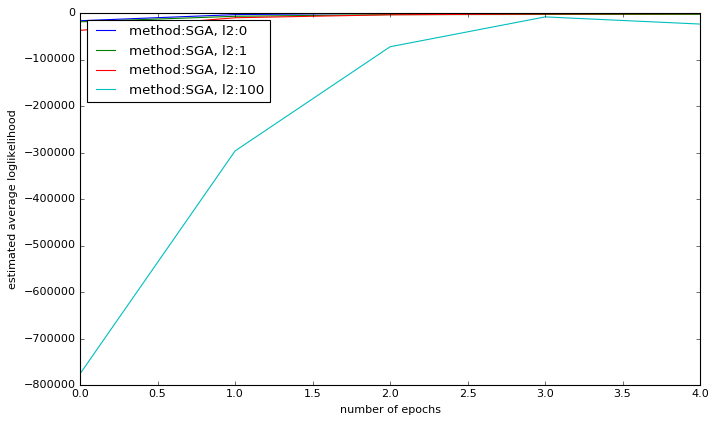

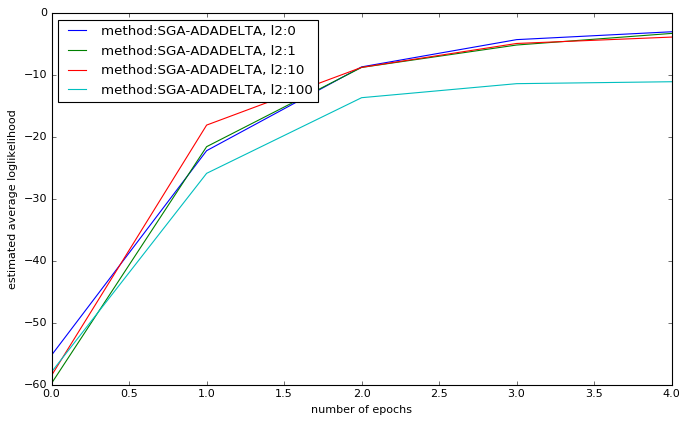

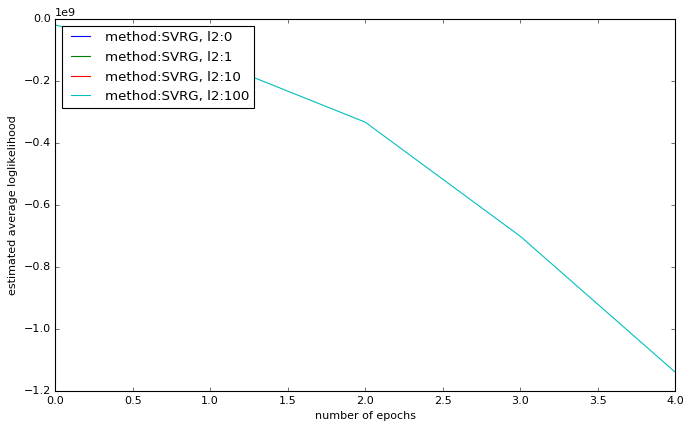

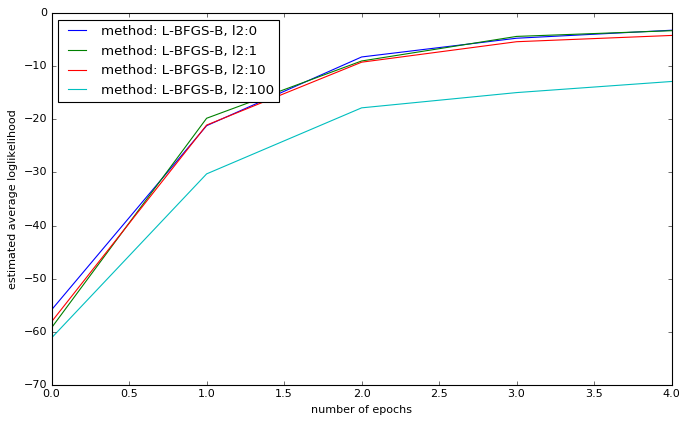

In [3]:
optimization_options = {'method': "",
                        'regularization_type': 'l2',
                        'regularization_value': 0,
                        'num_epochs':5
                        }
options = ('SGA', 'SGA-ADADELTA', 'SVRG',' L-BFGS-B')
for i, method in enumerate(options):
    plt.figure(i)
    for c in (0, 1, 10, 100):
        print("evaluating method: {}, with l2 regularization: {}".format(method, c))
        optimization_options['method'] = method
        optimization_options['regularization_value'] = c
        model_dir = run_training('HO_AD', trainconfig_3, optimization_options)[0]
        if(method != 'L-BFGS-B'):
            avg_ll = ReaderWriter.read_data(os.path.join(model_dir, 'avg_loglikelihood_training'))
            plt.plot(avg_ll[1:], label="method:{}, l2:{}".format(method, c))
    plt.legend(loc='upper left')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average loglikelihood')
    if(method == 'L-BFGS-B'): # delete figure case of L-BFGS-B as no saved intermediary likelihood 
        f = plt.gcf()
        del f

# Testing perceptron-based training methods

evaluating method: COLLINS-PERCEPTRON
dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
constructing model -- processed seqs:  1
constructing model -- processed seqs:  2
constructing model -- processed seqs:  3
constructing model -- processed seqs:  4
constructing model -- processed seqs:  5
identifying model active features -- processed seqs:  1
identifying model active features -- processed seqs:  2
identifying model active features -- processed seqs:  3
identifying model active features -- processed seqs:  4
identifying model active features -- processed seqs:  5
sequences left 5
in full update routine ...
sequences left 4
in full update routine ...
sequences left 3
in full update routine ...
sequences left 2
in full update routine ...
sequences left 1
in full update routine ...
reldiff = 1.0
average error : [0

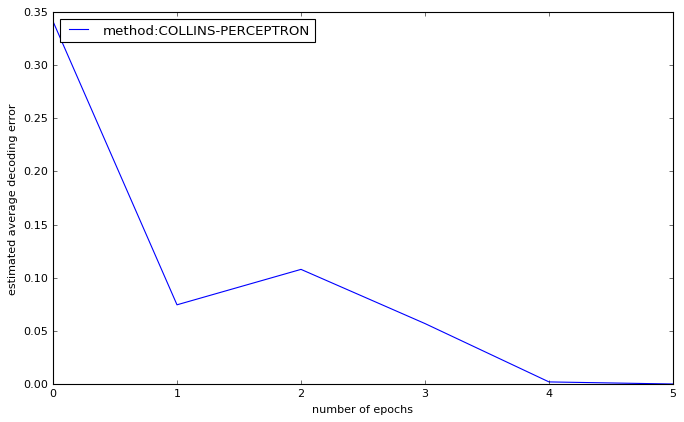

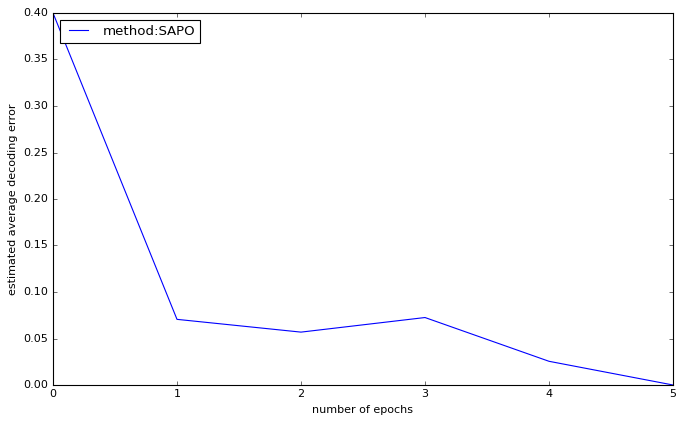

In [15]:
options = ('COLLINS-PERCEPTRON', 'SAPO')
optimization_options = {'method': "",
                        'num_epochs':10,
                        'update_type':'max-fast',
                        'beam_size':-1,
                        'shuffle_seq':False
                        }
for i, method in enumerate(options):
    plt.figure(i)
    print("evaluating method: {}".format(method))
    optimization_options['method'] = method
    model_dir = run_training('HO_AD', trainconfig_3, optimization_options)[0]
    # average decoding error -- this should generally be a decreasing graph 
    avg_dec_error = ReaderWriter.read_data(os.path.join(model_dir, 'avg_decodingerror_training'))
    plt.plot(avg_dec_error[1:], label="method:{}".format(method))
    plt.legend(loc='upper left')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average decoding error')